In [1]:
import xrayutilities as xu

import pandas as pd
import matplotlib.pyplot as plt

from lmfit.models import GaussianModel
plt.rcParams.update({'font.size' : 14})

In [2]:
def gaussian(df, plot = False):
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]

    mod  = GaussianModel()
    pars = mod.guess(y, x = x)
    out  = mod.fit(y, pars, x = x)

    beta  = out.best_values['sigma'] * 2
    omega = out.best_values['center']

    if plot:
        fig, ax = plt.subplots(1,1)
        ax.plot(x, y, 'rx')
        ax.plot(x, out.best_fit, 'b')
        ax.ticklabel_format(axis='y', style='sci', scilimits=(4,5))
        ax.yaxis.major.formatter._useMathText = True
        ax.set_xlabel('$\omega$ ($\degree$)')
        ax.set_ylabel('Intensity (cps)')
    return (out, beta, omega)

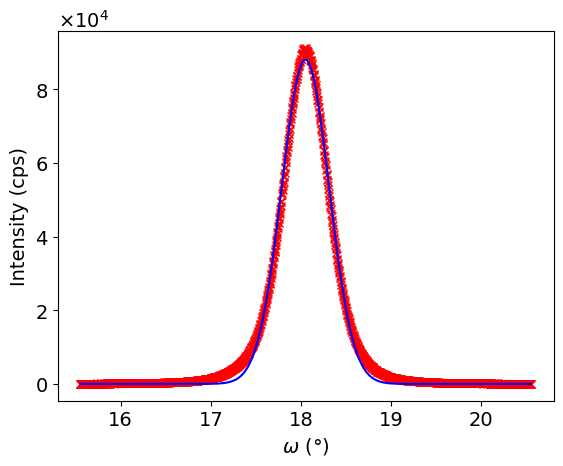

In [7]:
data_file = xu.io.rigaku_ras.RASFile('data/example.ras')
data_file.Read()

xrc_002 = pd.DataFrame(data_file.scans[0].data)
out_002, beta_002, theta_002 = gaussian(xrc_002, plot = True)

In [9]:
theta_002

18.04931255351529

In [10]:
beta_002

0.5258006754795121